In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
nba_draft=pd.read_csv('C:/Users/luis-serrano-l/Documents/Python Scripts/.notebook/.notebook/draft-data-20-years.csv')
nba_draft.shape
nba_draft.head()

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


In [186]:
'''
Pk: Corresponds to the pick with which a player was selected in the NBA draft.
Tm: The NBA team that drafted a player.
Player: The name of the player.
College: The college an NBA draft pick attended. For international prospects, players who were drafted out of the G-League, and players who were drafted directly out of high school, this column is blank.
Yrs: Years spent in the NBA. NA for players who did not play a single season.
G: Games played in the NBA. NA for players who did not play a single game.
TOTMP: Total minutes played in the NBA. NA for players who did not play a single minute.
TOTPTS: Total points scored in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a point.
TOTTRB: Total rebounds grabbed in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record a rebound.
TOTAST: Total assists recorded in the NBA. NA for players who did not play in the NBA; 0 for players who did but failed to record an assist.
FG%: Field goal percentage in the NBA. NA for players who did not play in the NBA
3P%: Three point percentage in the NBA. NA for players who did not play in the NBA
FT%: Free throw percentage in the NBA. NA for players who did not play in the NBA
WS: Win shares in the NBA, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
WS/48: Win shares in the NBA per 48 minutes, using Basketball-Reference's Win Shares. NA for players who did not play in the NBA
BPM: Box plus-minus in the NBA, using Basketball-Reference. NA for players who did not play in the NBA
VORP Value over replacement player, using Basketball-Reference. NA for players who did not play in the NBA
DraftYr and DraftYear: Duplicate variables for the year a player was drafted.
playerurl: A player's college Sports-Reference statistics page link. NA for players from high school/G-League/international.
MPG, PPG, RPG, APG: Per game statistics computed from totals columns. NA for players who did not play in the NBA.
'''
nba_draft.columns

Index(['Unnamed: 0', 'Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G',
       'TOTMP', 'TOTPTS', 'TOTTRB', 'TOTAST', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'BPM', 'VORP', 'DraftYr', 'MPG', 'PPG', 'RPG', 'APG',
       'playerurl', 'DraftYear'],
      dtype='object')

In [ ]:
nba_draft.drop(['Unnamed: 0', 'Rk', 'DraftYr', 'playerurl'], axis=1, inplace=True)
nba_draft[['FG%', '3P%', 'FT%']]=nba_draft[['FG%', '3P%', 'FT%']]*100
nba_draft['Games per season']= nba_draft['G']/nba_draft['Yrs']

In [188]:
relevant_players= nba_draft.loc\
    [((nba_draft['Games per season']>50) & (nba_draft['MPG']>20))\
     | ((nba_draft['DraftYear']==2021.0) & (nba_draft['MPG']>10) & (nba_draft['Games per season']>30))]

In [ ]:
relevant_players['FG balance']=relevant_players['FG%'] - relevant_players['FG%'].mean()
relevant_players['PPG balance']= relevant_players['PPG'] - relevant_players['PPG'].mean()
relevant_players['3P balance']= relevant_players['3P%'] - relevant_players['3P%'].mean()
accuracy_data= relevant_players.groupby('DraftYear')['FG balance', '3P balance', 'PPG balance'].mean().round(2)

In [ ]:
relevant_players['FT% - 45']= (relevant_players['FT%']) - 45
accuracy_data_3_ft= relevant_players.groupby('DraftYear')['FT% - 45', '3P%'].mean().round(2)

In [191]:
scoring_data= nba_draft.loc\
    [((nba_draft['Games per season']>50) & (nba_draft['MPG']>10))\
     | ((nba_draft['DraftYear']==2021.0) & (nba_draft['MPG']>10) & (nba_draft['Games per season']>30))]\
         .groupby('DraftYear')['PPG'].mean().round(2)

<AxesSubplot:title={'center':'Evolution of players´ scoring given year drafted'}, xlabel='DraftYear'>

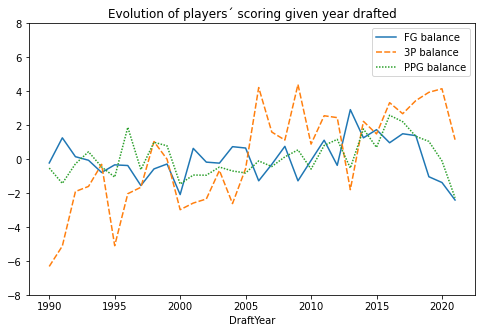

In [192]:
plt.figure(figsize=(8, 5))
plt.title('Evolution of players´ scoring given year drafted')
plt.ylim(-8, 8)
sns.lineplot(data=accuracy_data)

In [193]:
#Younger players shoot more 3 point shots (which are more risky due to distance to the rim)
#that's why the improvement of players in 3P% over the years hasn't had an impact on FG%
#although there has been a small growth in points per game, which makes sense
#Given that FG% hasn't changed much while the 3P% grows,
#and we have no reason to think 2P% is lower, it means that they are shooting more 3P
#There has been a subtle improvement in PPG, so they are probable right when shooting more 3P
#The more 3 pointers vs 2 pointers they shoot, the less field goals % there will be
#This compensates for the improvement in 3P%

<AxesSubplot:title={'center':'Evolution of accuracy given player draft year'}, xlabel='DraftYear', ylabel='Accuracy'>

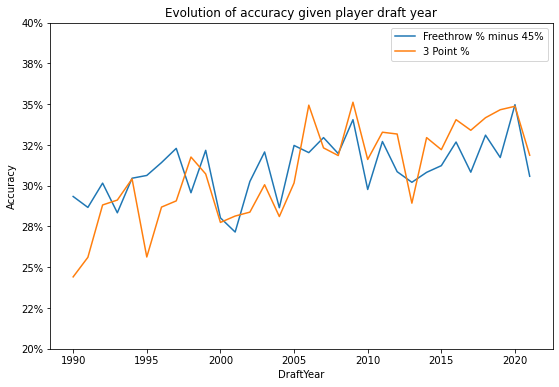

In [194]:

plt.figure(figsize=(9, 6))
plt.title('Evolution of accuracy given player draft year')
plt.ylim(20, 40)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.ylabel('Accuracy')
sns.lineplot(data=accuracy_data_3_ft['FT% - 45'], label='Freethrow % minus 45%')
sns.lineplot(data=accuracy_data_3_ft['3P%'], label='3 Point %')

In [195]:
players_with_enough_minutes_played= nba_draft.loc[nba_draft.TOTMP>1000]
top_10= relevant_players.set_index('BPM').sort_index(ascending=False).head(10)
top_10['Draft and Pick']= top_10.DraftYear.astype(str) + ', ' + top_10.Pk.astype(str)
top_10['Avg games_per_season']=(top_10['G']/top_10['Yrs']).round(1)
top_10[['Player', 'Draft and Pick', 'Avg games_per_season']]

,Player,Draft and Pick,Avg games_per_season
BPM,,,
8.9,LeBron James,"2003, 1",71.1
8.7,Nikola Jokić,"2014, 41",72.1
7.3,Chris Paul,"2005, 4",67.5
6.9,Kawhi Leonard,"2011, 15",57.6
6.8,James Harden,"2009, 3",70.8
6.8,Kevin Durant,"2007, 2",65.7
6.6,Luka Dončić,"2018, 3",60.8
6.5,Stephen Curry,"2009, 7",62.8
6.0,Anthony Davis,"2012, 1",60.1


(5.0, 9.1)

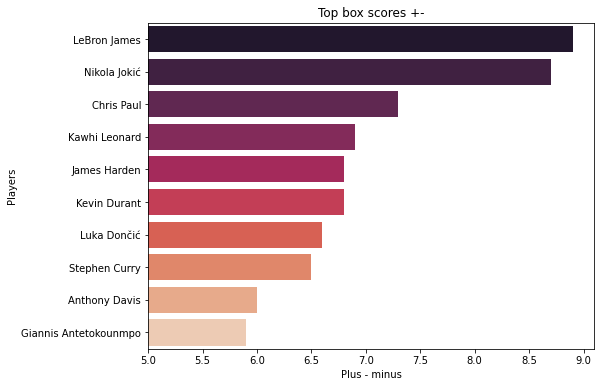

In [196]:
plt.figure(figsize=(8, 6))
plt.title('Top box scores +-')
sns.barplot(x=top_10.index, y=top_10['Player'], palette='rocket')
plt.ylabel('Players')
plt.xlabel('Plus - minus')
plt.xlim(5, 9.1)


In [197]:
top_10_v= relevant_players.loc[relevant_players['TOTMP']>44640].set_index('TOTMP').sort_index(ascending=False).head(10)
top_10_v['Days']= (top_10_v.index)/(24*60)
top_10_v['Hours']=((((top_10_v['Days'])-(top_10_v['Days'].apply(np.floor)))*24).round(0)).astype(int)
top_10_v['Days']= (top_10_v['Days'].apply(np.floor)).astype(int)
top_10_v['Non-stop sum']=f'{top_10_v.Days.astype(str)}d , {top_10_v.Hours.astype(str)}h'
top_10_v[['TOTPTS', 'TOTTRB', 'TOTAST']]= top_10_v[['TOTPTS', 'TOTTRB', 'TOTAST']].apply(lambda x: f'{(x/1000).round(0).astype(int).astype(str)}K')
top_10_v[['Yrs', 'G']]= top_10_v[['Yrs', 'G']].apply(lambda x: x.astype(int))
top_10_v.rename({'FG%': 'FG'}, axis=1, inplace=True)
top_10_v['FG']= top_10_v['FG'].round(1).astype(str) + '%'
top_10_v[['Player', 'TOTPTS', 'TOTTRB', 'TOTAST', 'FG', 'Non-stop sum', 'Yrs', 'G']]


,Player,TOTPTS,TOTTRB,TOTAST,FG,Non-stop sum,Yrs,G
TOTMP,,,,,,,,
51563.0,LeBron James,37K,10K,10K,50.5%,"35d , 19h",19,1351
51368.0,Dirk Nowitzki,32K,11K,4K,47.1%,"35d , 16h",21,1522
50418.0,Kevin Garnett,26K,15K,5K,49.7%,"35d , 0h",21,1462
50111.0,Jason Kidd,18K,9K,12K,40.0%,"34d , 19h",19,1391
48637.0,Kobe Bryant,34K,7K,6K,44.7%,"33d , 19h",20,1346
47368.0,Tim Duncan,26K,15K,4K,50.6%,"32d , 21h",19,1392
47117.0,Gary Payton,22K,5K,9K,46.6%,"32d , 17h",17,1335
46367.0,Vince Carter,26K,7K,5K,43.5%,"32d , 5h",22,1541
46344.0,Ray Allen,25K,5K,4K,45.2%,"32d , 4h",18,1300


In [198]:
number_of_players_who_didnt_compete_in_college= relevant_players['College'].isna().sum()
percentage_of_non_college_players= (relevant_players['College'].isna().sum()/relevant_players.shape[0]*100).round(2)
print(number_of_players_who_didnt_compete_in_college)
print(percentage_of_non_college_players)

98
16.55


In [199]:
avg_acc_non_college= (relevant_players.loc[relevant_players['College'].isna()]['FG%'].mean()).round(2)
avg_ppg_non_college= relevant_players.loc[relevant_players['College'].isna()]['PPG'].mean().round(2)
print('The average accuracy by non college players is:\n{}%'.format(avg_acc_non_college))
print('The average points per game by non college players is:\n{}'.format(avg_ppg_non_college))

The average accuracy by non college players is:
47.16%
The average points per game by non college players is:
12.1


In [200]:
avg_acc_college= (relevant_players.loc[relevant_players['College'].isna()==False]['FG%'].mean()).round(2)
avg_ppg_college= relevant_players.loc[relevant_players['College'].isna()==False]['PPG'].mean().round(2)
print('The average accuracy by college players is:\n{}%'.format(avg_acc_college))
print('The average points per game by college players is:\n{}'.format(avg_ppg_college))

The average accuracy by college players is:
45.26%
The average points per game by college players is:
11.95


In [201]:
drafted_under_30th_pick=(relevant_players.loc[relevant_players['Pk']>30]).index
relevant_players.drop(drafted_under_30th_pick, axis=0, inplace=True)
fg=[]
picked=[]
ppg=[]
for i in range(1, 31):
    fg.append(((relevant_players.loc[relevant_players['Pk']==i]['FG%']).mean()).round(2))
for p in range(1, 31):
    picked.append(p)
for g in range(1, 31):
    ppg.append(relevant_players.loc[relevant_players['Pk']==g]['PPG'].mean().round(2))

C:\Users\luis-serrano-l\AppData\Local\Temp\ipykernel_4696\27959094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_players.drop(drafted_under_30th_pick, axis=0, inplace=True)


Text(0.5, 0, 'Draft position')

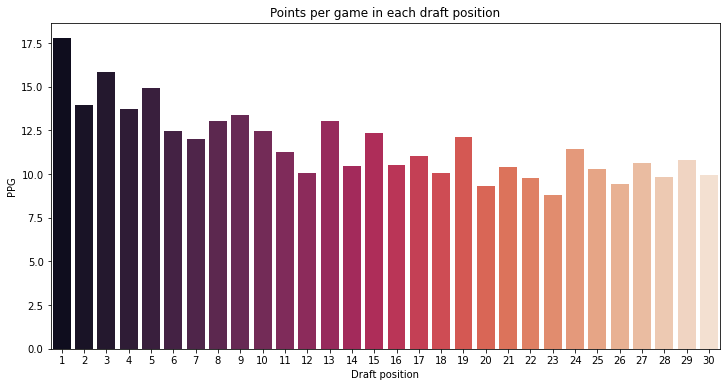

In [202]:
plt.figure(figsize=(12,6))
plt.title('Points per game in each draft position')
sns.barplot(x=picked, y=ppg, palette='rocket')
plt.ylabel('PPG')
plt.xlabel('Draft position')

Text(0.5, 0, 'Draft position')

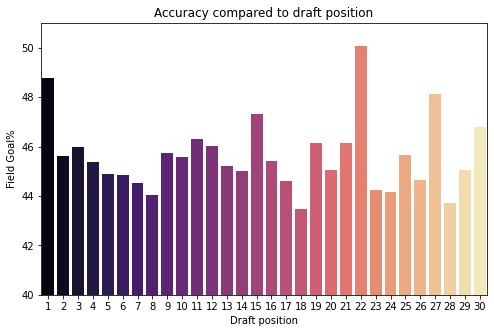

In [203]:
plt.figure(figsize=(8,5))
plt.title('Accuracy compared to draft position')
sns.barplot(x=picked, y=fg, palette='magma')
plt.ylim(40, 51)
plt.ylabel('Field Goal%')
plt.xlabel('Draft position')

In [204]:
relevant_players.loc[relevant_players['Pk']==22]

,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,...,MPG,PPG,RPG,APG,DraftYear,Games per season,FG balance,PPG balance,3P balance,FT% - 45
129,22,PHO,Oliver Miller,Arkansas,9.0,493.0,11338.0,3625.0,2893.0,1061.0,...,23.0,7.4,5.9,2.2,1992,54.777778,7.823142,-4.576014,-19.138644,18.9
183,22,CLE,Chris Mills,Arizona,10.0,568.0,17282.0,6357.0,2808.0,1063.0,...,30.4,11.2,4.9,1.9,1993,56.800000,-2.376858,-0.776014,4.361356,36.7
522,22,HOU,Kenny Thomas,New Mexico,11.0,632.0,17306.0,5876.0,4341.0,975.0,...,27.4,9.3,6.9,1.5,1999,57.454545,0.923142,-2.676014,-6.338644,24.9
869,22,DEN,Jarrett Jack,Georgia Tech,13.0,867.0,24140.0,9349.0,2487.0,3952.0,...,27.8,10.8,2.9,4.6,2005,66.692308,-1.576858,-1.176014,3.561356,40.5
989,22,CHA,Jared Dudley,Boston College,14.0,904.0,20117.0,6633.0,2849.0,1394.0,...,22.3,7.3,3.2,1.5,2007,64.571429,0.723142,-4.676014,8.561356,28.2
1049,22,ORL,Courtney Lee,Western Kentucky,12.0,811.0,21938.0,7765.0,2127.0,1353.0,...,27.1,9.6,2.6,1.7,2008,67.583333,-0.476858,-2.376014,8.061356,40.3
1229,22,DEN,Kenneth Faried,Morehead State University,8.0,478.0,11728.0,5430.0,3884.0,470.0,...,24.5,11.4,8.1,1.0,2011,59.750000,9.023142,-0.576014,-8.538644,20.4
1349,22,BRK,Mason Plumlee,Duke,9.0,639.0,14274.0,5349.0,4222.0,1542.0,...,22.3,8.4,6.6,2.4,2013,71.000000,12.623142,-3.576014,-25.838644,11.1
1469,22,CHI,Bobby Portis,Arkansas,7.0,432.0,9277.0,4751.0,2803.0,517.0,...,21.5,11.0,6.5,1.2,2015,61.714286,1.423142,-0.976014,7.661356,30.2
1589,22,BRK,Jarrett Allen,Texas,5.0,335.0,8883.0,3851.0,2913.0,466.0,...,26.5,11.5,8.7,1.4,2017,67.000000,16.723142,-0.476014,-11.838644,24.8
